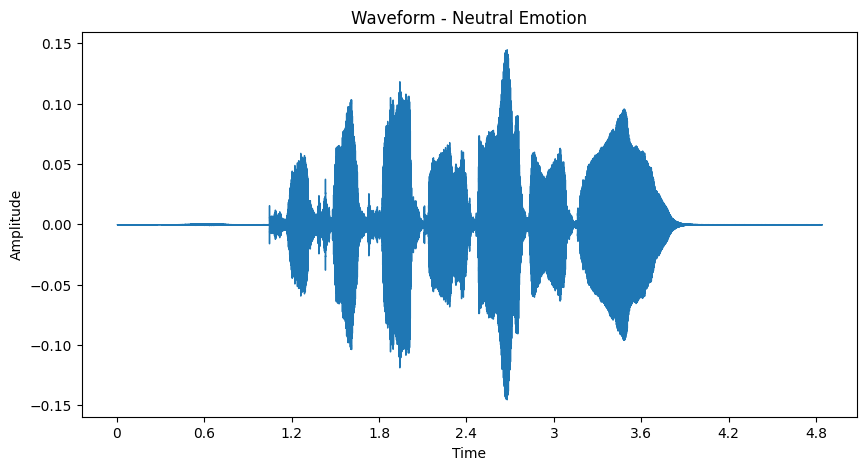

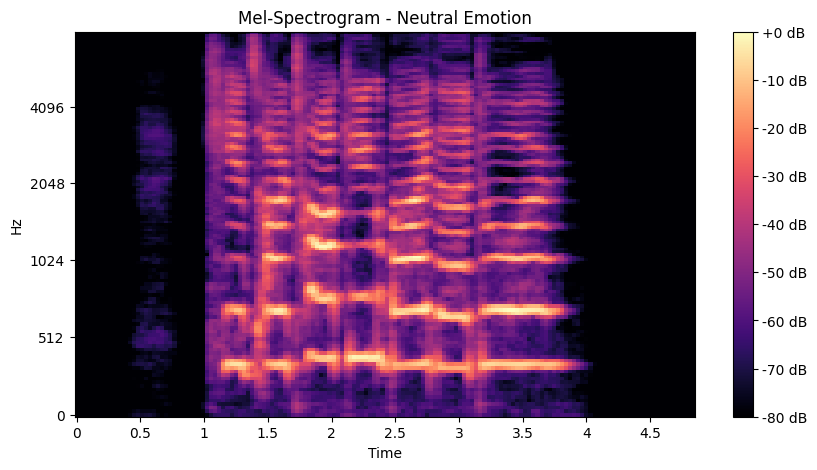

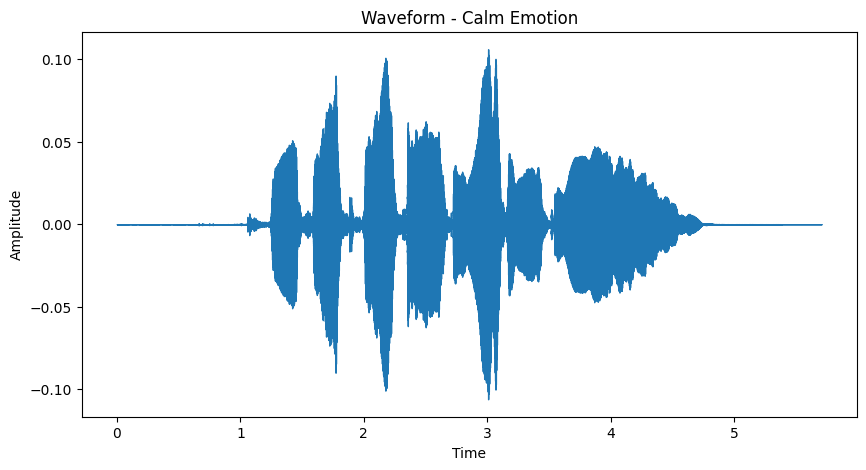

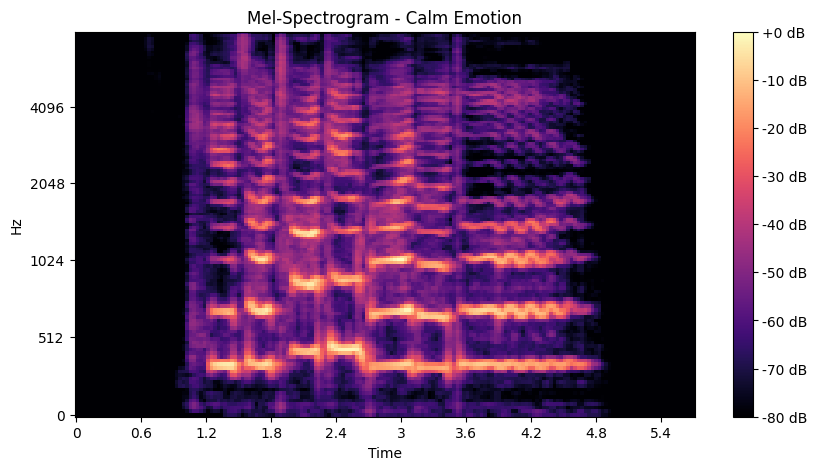

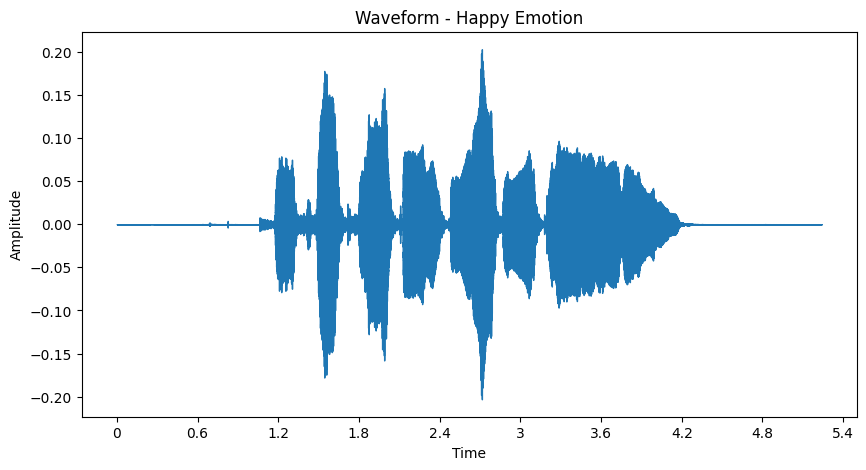

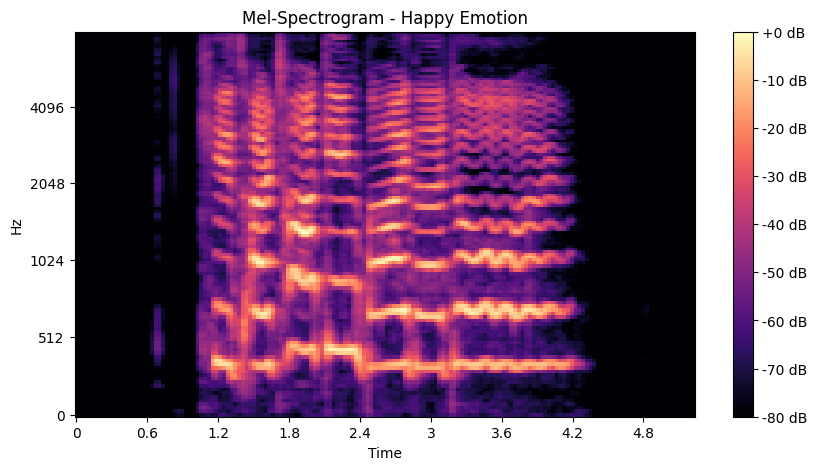

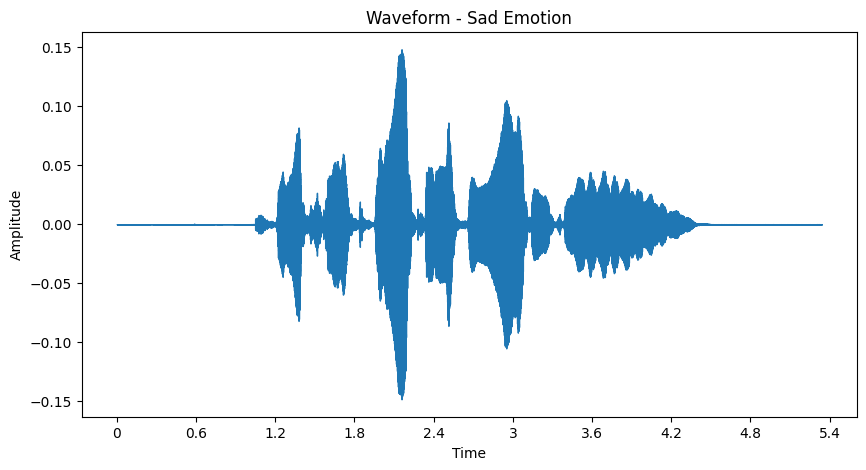

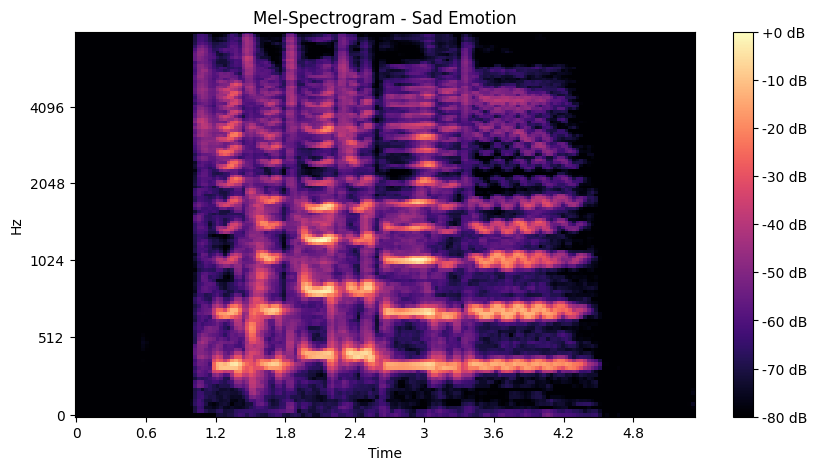

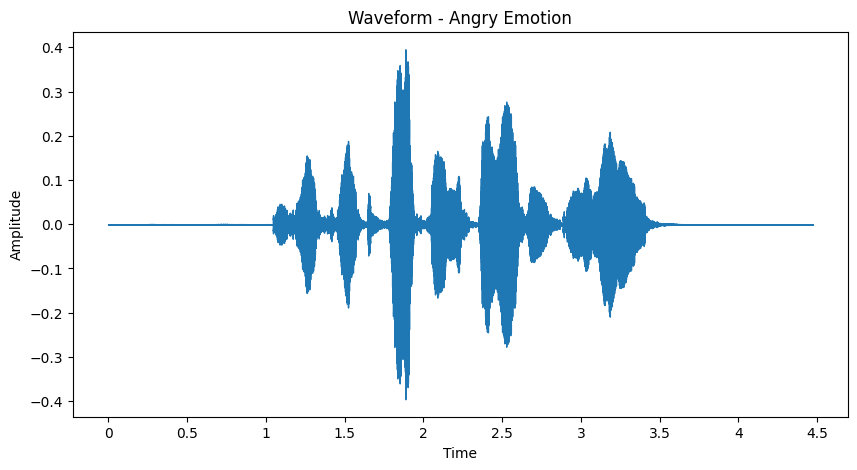

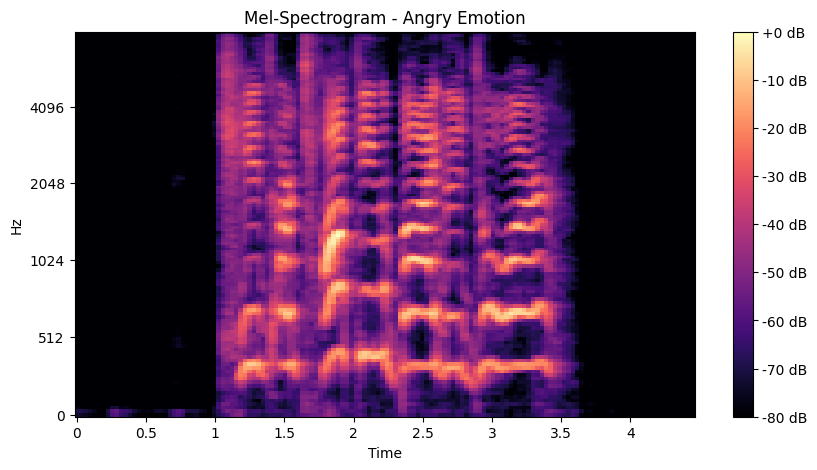

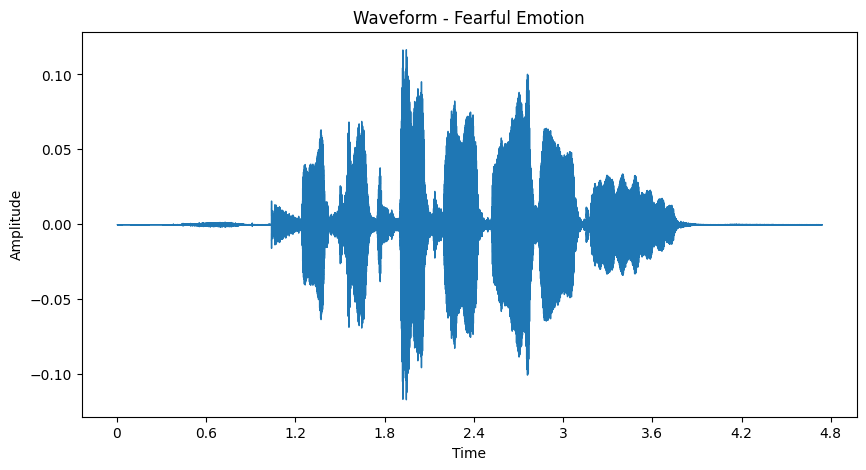

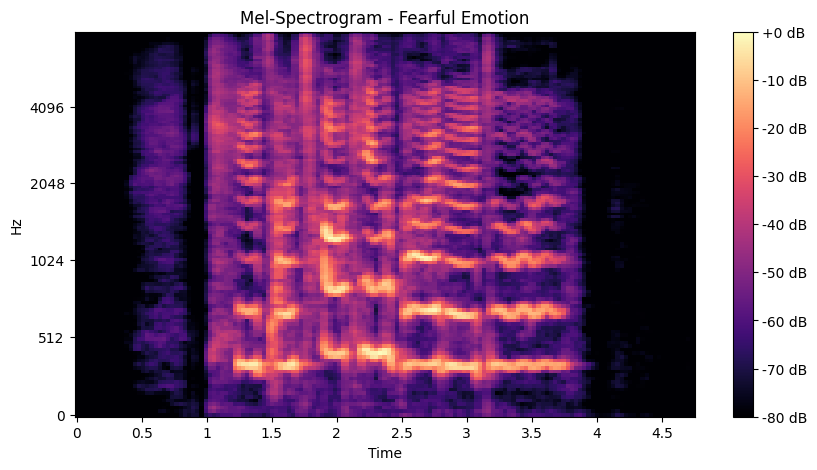

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
from omegaconf import OmegaConf

# Ruta base: carpeta del notebook
notebook_dir = os.getcwd()

# Ruta absoluta al archivo config.yaml (desde notebooks/ subir un nivel y entrar a configs)
config_path = os.path.abspath(os.path.join(notebook_dir, '../configs/config.yaml'))

# Cargar configuración
cfg = OmegaConf.load(config_path)

# Construir ruta absoluta a los datos de entrenamiento (data/ravdess/train)
DATA_DIR = os.path.abspath(os.path.join(notebook_dir, '../', cfg.data.train_dir))

# Verificar que el directorio existe
if not os.path.exists(DATA_DIR):
    raise FileNotFoundError(f"Directorio no encontrado: {DATA_DIR}")

SAMPLE_RATE = cfg.data.sample_rate
N_MELS = cfg.data.n_mels
FIG_SIZE = (10, 5)

# Definir emociones y sus IDs
emotions = {
    'neutral': '01',
    'calm': '02',
    'happy': '03',
    'sad': '04',
    'angry': '05',
    'fearful': '06',
    'surprise': '07',
    'disgust': '08'
}

# Encontrar un archivo por cada emoción
emotion_files = {}
for file in os.listdir(DATA_DIR):
    if file.endswith('.wav'):
        emotion_id = file.split('-')[2]
        for emotion, eid in emotions.items():
            if emotion_id == eid and emotion not in emotion_files:
                emotion_files[emotion] = file
                break

# Visualizar cada emoción
for emotion, file_name in emotion_files.items():
    file_path = os.path.join(DATA_DIR, file_name)

    # Cargar audio
    signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)

    # Graficar waveform
    plt.figure(figsize=FIG_SIZE)
    librosa.display.waveshow(signal, sr=SAMPLE_RATE)
    plt.title(f'Waveform - {emotion.capitalize()} Emotion')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

    # Calcular y graficar mel-spectrograma
    mel_spec = librosa.feature.melspectrogram(y=signal, sr=SAMPLE_RATE, n_mels=N_MELS)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    plt.figure(figsize=FIG_SIZE)
    librosa.display.specshow(mel_spec_db, sr=SAMPLE_RATE, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel-Spectrogram - {emotion.capitalize()} Emotion')
    plt.show()


evaluate.ipynb  explore_ravdess.ipynb


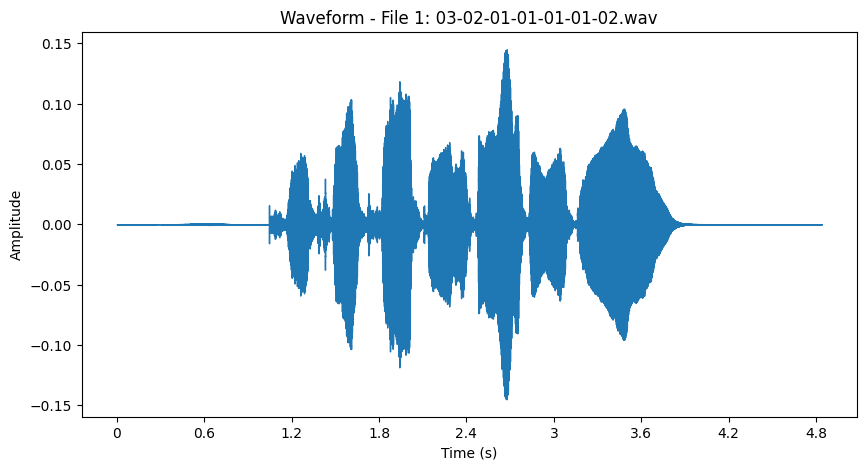

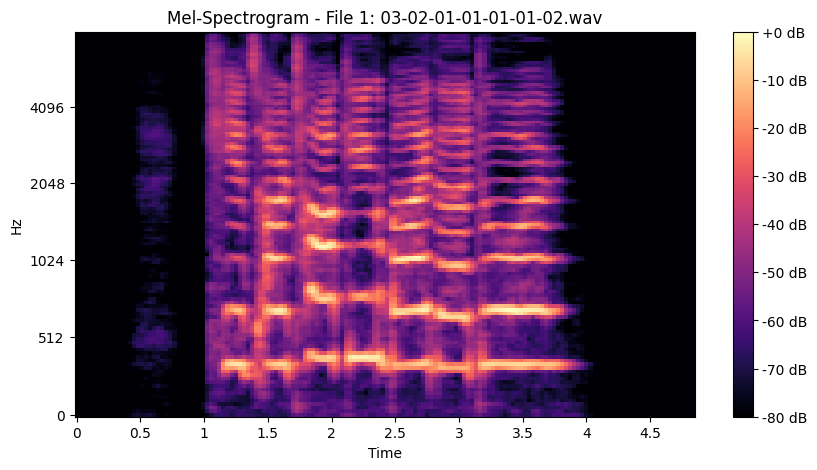

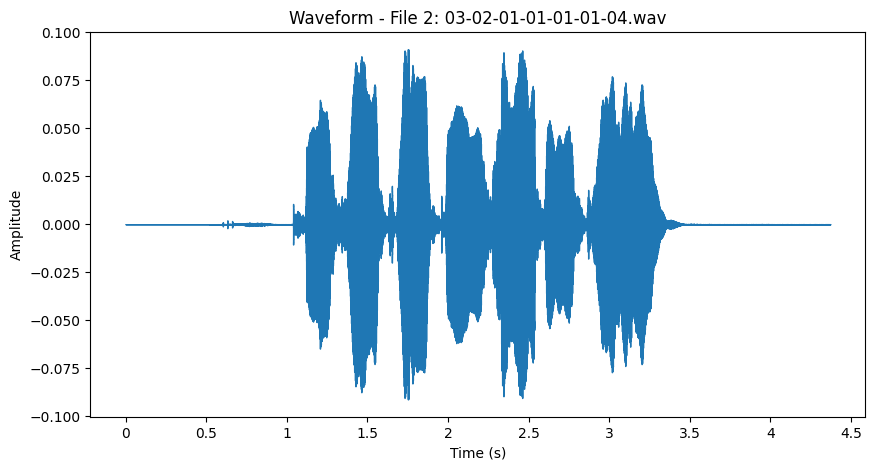

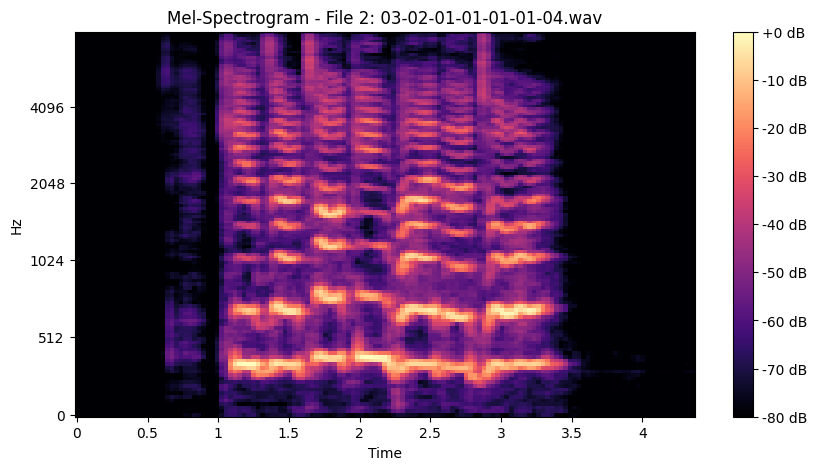

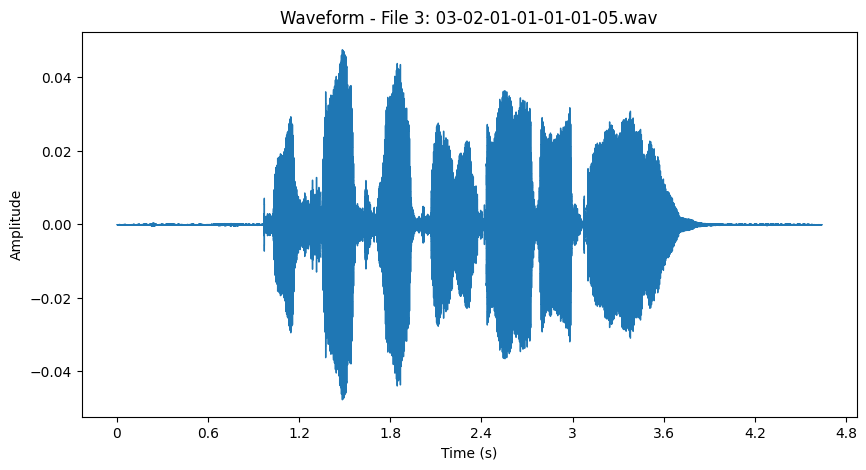

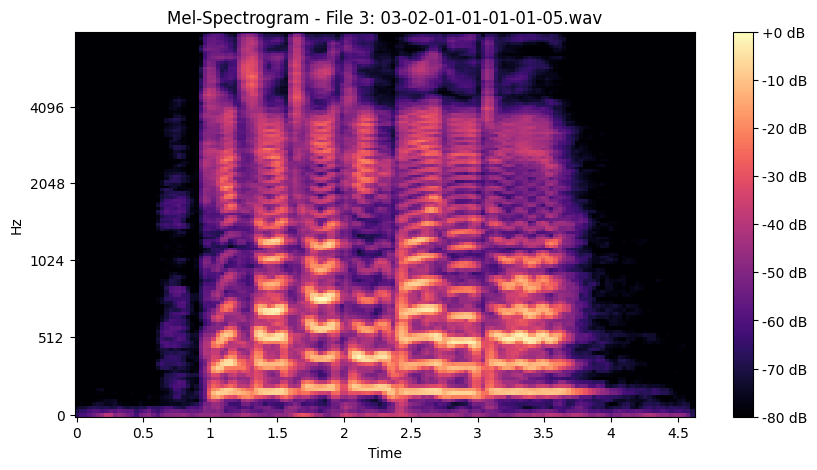

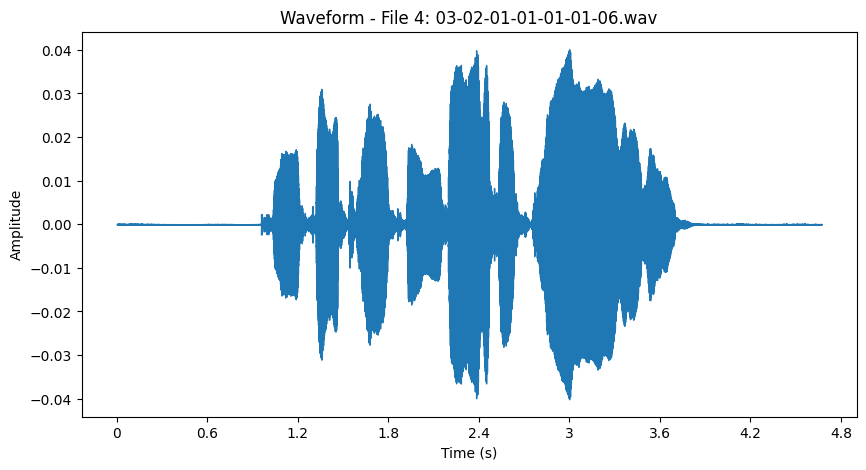

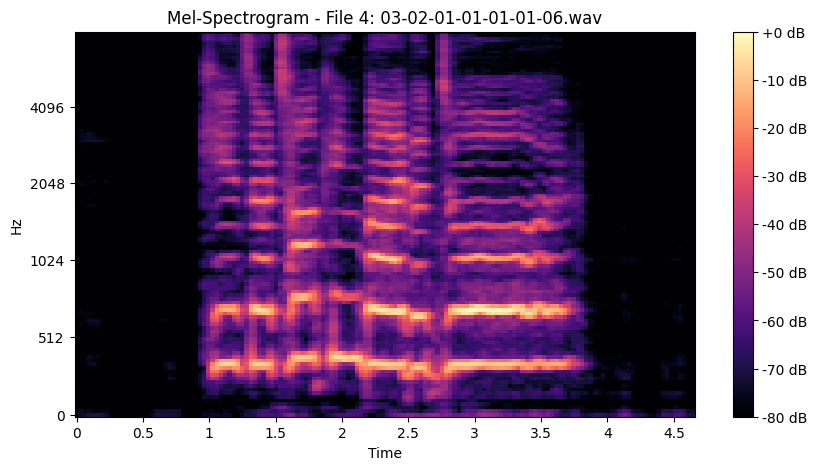

In [10]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
from omegaconf import OmegaConf

# Ruta base: carpeta del notebook
notebook_dir = os.getcwd()

# Ruta absoluta al archivo config.yaml
config_path = os.path.abspath(os.path.join(notebook_dir, '../configs/config.yaml'))

# Cargar configuración
cfg = OmegaConf.load(config_path)

# Ruta datos entrenamiento
DATA_DIR = os.path.abspath(os.path.join(notebook_dir, '../', cfg.data.train_dir))

# Verificar que el directorio existe
if not os.path.exists(DATA_DIR):
    raise FileNotFoundError(f"Directorio no encontrado: {DATA_DIR}")

SAMPLE_RATE = cfg.data.sample_rate
N_MELS = cfg.data.n_mels
FIG_SIZE = (10, 5)

# Obtener los primeros 35 archivos wav del directorio de entrenamiento
wav_files = [f for f in os.listdir(DATA_DIR) if f.endswith('.wav')]
wav_files = wav_files[:4]

for i, file_name in enumerate(wav_files, 1):
    file_path = os.path.join(DATA_DIR, file_name)

    # Cargar audio
    signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)

    # Plot waveform
    plt.figure(figsize=FIG_SIZE)
    librosa.display.waveshow(signal, sr=sr)
    plt.title(f'Waveform - File {i}: {file_name}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # Plot mel-spectrogram
    mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=N_MELS)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    plt.figure(figsize=FIG_SIZE)
    librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel-Spectrogram - File {i}: {file_name}')
    plt.show()


Reproduciendo archivo 1: 03-02-02-01-01-02-14.wav


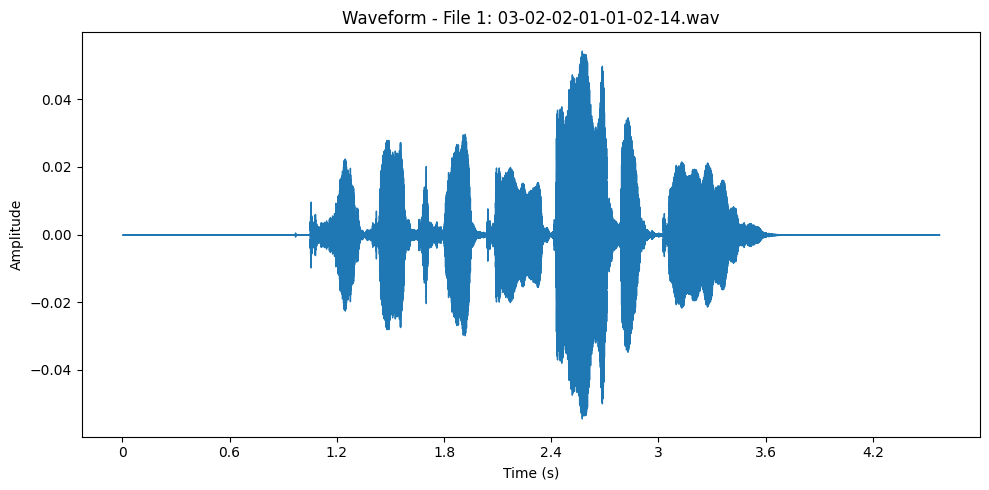

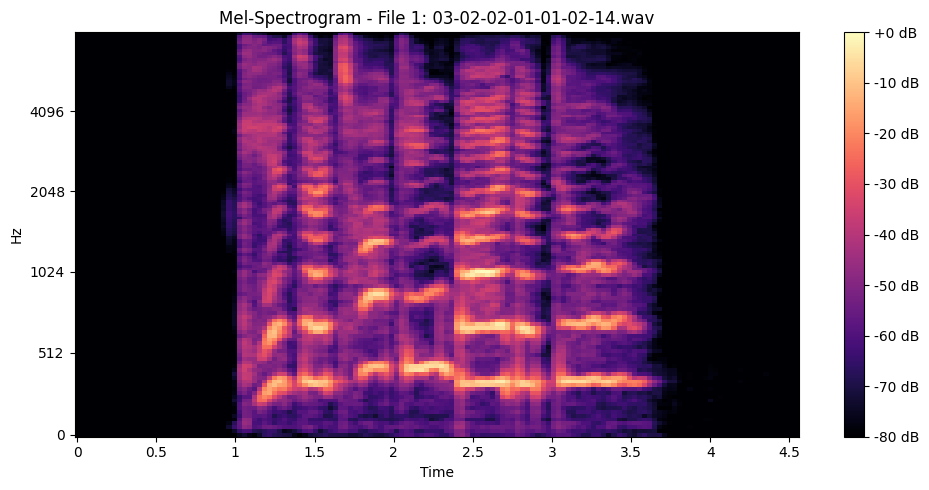

Reproduciendo archivo 2: 03-02-02-01-01-02-15.wav


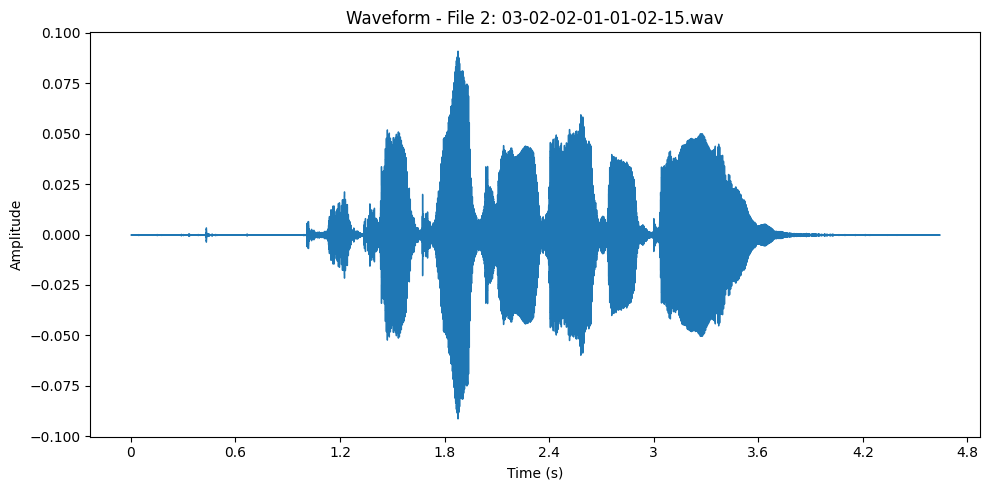

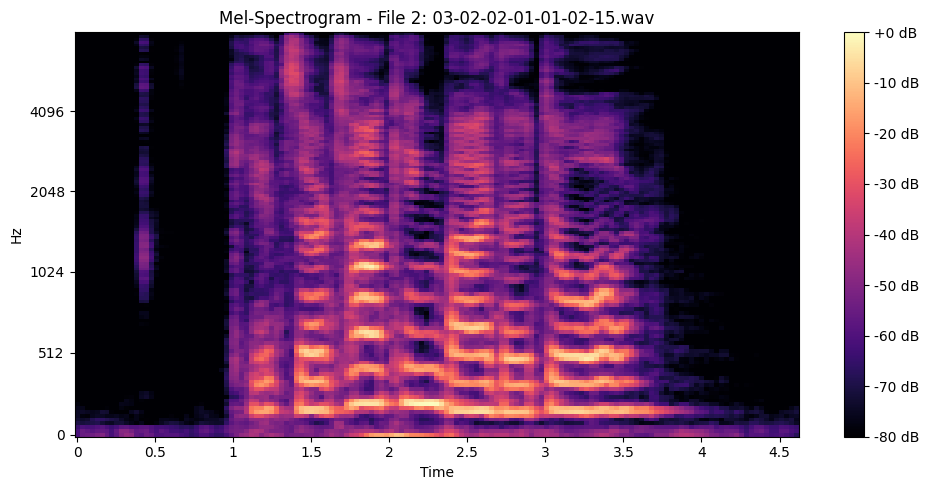

Reproduciendo archivo 3: 03-02-02-01-01-02-16.wav


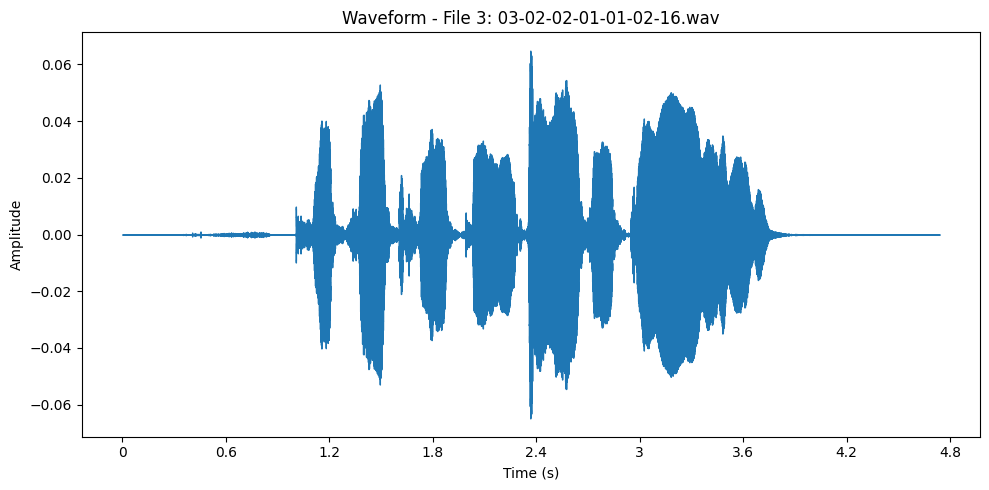

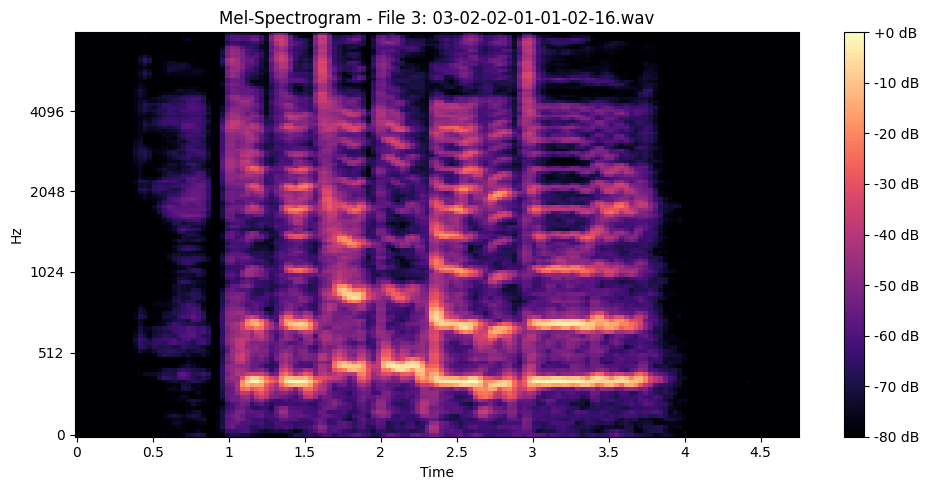

Reproduciendo archivo 4: 03-02-02-01-01-02-17.wav


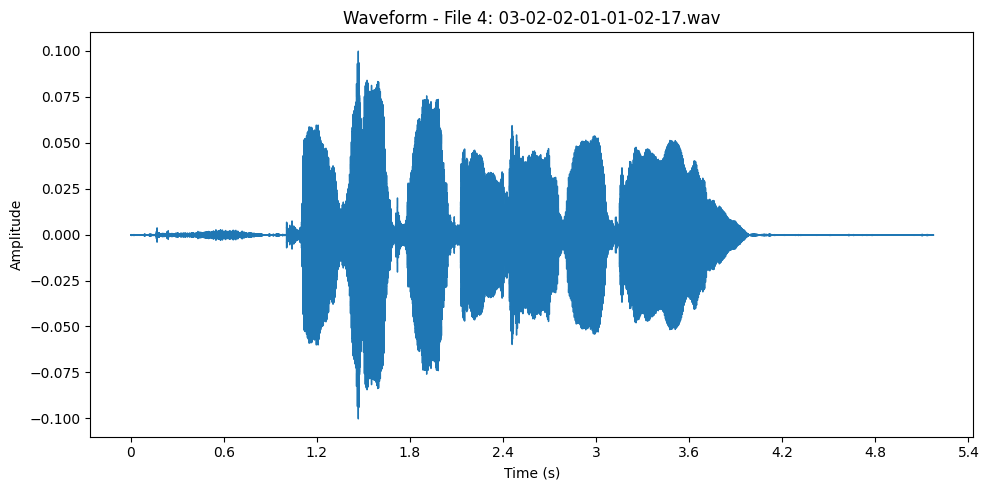

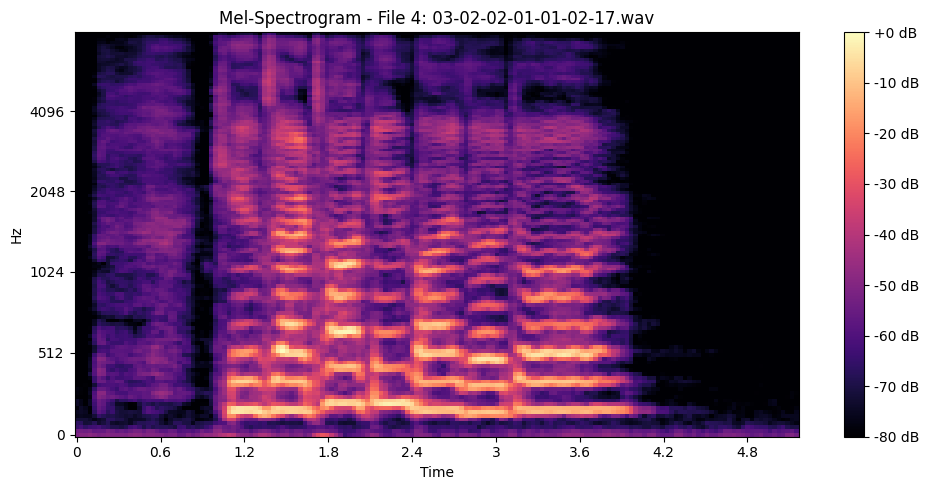

In [12]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
from omegaconf import OmegaConf
from IPython.display import Audio, display

# Ruta base: carpeta del notebook
notebook_dir = os.getcwd()

# Ruta absoluta al archivo config.yaml
config_path = os.path.abspath(os.path.join(notebook_dir, '../configs/config.yaml'))

# Cargar configuración
try:
    cfg = OmegaConf.load(config_path)
except FileNotFoundError:
    raise FileNotFoundError(f"Archivo de configuración no encontrado: {config_path}")

# Ruta datos entrenamiento
DATA_DIR = os.path.abspath(os.path.join(notebook_dir, '../', cfg.data.train_dir))

# Verificar que el directorio existe
if not os.path.exists(DATA_DIR):
    raise FileNotFoundError(f"Directorio no encontrado: {DATA_DIR}")

SAMPLE_RATE = cfg.data.sample_rate
N_MELS = cfg.data.n_mels
FIG_SIZE = (10, 5)

# Obtener los primeros 4 archivos wav del directorio de entrenamiento
wav_files = [f for f in os.listdir(DATA_DIR) if f.endswith('.wav')]
if not wav_files:
    raise ValueError(f"No se encontraron archivos .wav en {DATA_DIR}")
wav_files = wav_files[100:104]

for i, file_name in enumerate(wav_files, 1):
    file_path = os.path.join(DATA_DIR, file_name)

    # Cargar audio
    try:
        signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)
    except Exception as e:
        print(f"Error al cargar {file_name}: {e}")
        continue

    # Mostrar y reproducir audio
    print(f'Reproduciendo archivo {i}: {file_name}')
    display(Audio(signal, rate=sr))

    # Plot waveform
    plt.figure(figsize=FIG_SIZE)
    librosa.display.waveshow(signal, sr=sr)
    plt.title(f'Waveform - File {i}: {file_name}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

    # Plot mel-spectrogram
    mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=N_MELS)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    plt.figure(figsize=FIG_SIZE)
    librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel-Spectrogram - File {i}: {file_name}')
    plt.tight_layout()
    plt.show()